<a href="https://colab.research.google.com/github/SikandarHussain6858/Machine-Learning/blob/main/ML_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Lab 3**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


### Metric Definition
Defines a utility function `error_rate` to calculate the proportion of incorrect predictions.

In [ ]:
def error_rate(y_true, y_pred):
    return np.mean(y_true != y_pred)


### Data Loading
Loads the Breast Cancer diagnostic dataset into a DataFrame and displays first rows for inspection.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

bc = load_breast_cancer()
df = pd.DataFrame(data=bc.data, columns=bc.feature_names)
df['target'] = bc.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# **Activity A**

A1: Create a tiny toy dataset
Defines a small "symptoms vs. allergy" dataset used to demonstrate manual metric calculations.

In [ ]:
import numpy as np
import pandas as pd

toy = pd.DataFrame({
    "sneezing":  [1,1,1,1,0,0,0,0],
    "red_eye":   [1,1,0,0,1,0,1,0],
    "allergic":  [1,1,1,0,0,0,0,0]
})

toy


,sneezing,red_eye,allergic
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,0,1,0
5,0,0,0
6,0,1,0
7,0,0,0


A2: Implement entropy
Implements the mathematical entropy formula and computes the initial uncertainty of the toy dataset.

In [ ]:
def entropy(y):
    # y is a 1D array-like of labels (0/1)
    values, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()
    return -np.sum(p * np.log2(p))

H_parent = entropy(toy["allergic"])
H_parent


np.float64(0.954434002924965)

A3: Implement mutual information for a binary split feature
Computes Information Gain for features, identifying "sneezing" as the most informative split.

In [ ]:
def mutual_information(y, split_feature):
    H = entropy(y)

    y0 = y[split_feature == 0]
    y1 = y[split_feature == 1]

    H_cond = (len(y0)/len(y)) * entropy(y0) + \
             (len(y1)/len(y)) * entropy(y1)

    return H - H_cond


for col in ["sneezing", "red_eye"]:
    print(col, mutual_information(toy["allergic"].values, toy[col].values))


sneezing 0.5487949406953987
red_eye 0.04879494069539858


A4: Check with scikit-learn (decision stump)
Trains a 1-level tree to verify that scikit-learn selects the same optimal feature as the manual method.

In [ ]:
X = toy[["sneezing","red_eye"]].values
y = toy["allergic"].values
stump = DecisionTreeClassifier(max_depth=1, criterion="entropy", random_state=42)
stump.fit(X, y)

print("Chosen feature index:", stump.tree_.feature[0])
print(export_text(stump, feature_names=["sneezing","red_eye"]))


Chosen feature index: 0
|--- sneezing <= 0.50
|   |--- class: 0
|--- sneezing >  0.50
|   |--- class: 1



### **a. What does entropy measure at a node?**

Entropy measures the uncertainty or impurity of the class labels at a node.
If all samples belong to one class, entropy is 0 (no uncertainty).
Higher entropy means the labels are more mixed, indicating greater uncertainty.

### **b. Why does maximizing MI reduce classification uncertainty?**

Maximizing mutual information selects the feature that reduces entropy the most after a split.
This creates purer child nodes with more similar class labels, which lowers classification uncertainty and improves the decision tree’s accuracy.

# **Activity B**

B1: Load data + split into train/val/test
Splits the full breast cancer dataset into stratified subsets for training and strict evaluation.

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)
df = data.frame
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

len(X_train), len(X_val), len(X_test)


(398, 85, 86)

The output `(398, 85, 86)` represents the size of the training, validation, and test datasets respectively after a 70/15/15 split.

B2: Train 2 trees: Gini vs Entropy (same depth)
Compares model performance using different impurity criteria; Entropy shows lower validation error here.

In [ ]:
tree_gini = DecisionTreeClassifier(max_depth=3, criterion="gini", random_state=42)
tree_ent  = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=42)

tree_gini.fit(X_train, y_train)
tree_ent.fit(X_train, y_train)
pred_val_g = tree_gini.predict(X_val)
pred_val_e = tree_ent.predict(X_val)

print("Val error (gini):   ", error_rate(y_val, pred_val_g))
print("Val error (entropy):", error_rate(y_val, pred_val_e))


Val error (gini):    0.058823529411764705
Val error (entropy): 0.011764705882352941


The validation error for Entropy (~0.012) is lower than Gini (~0.059), indicating Entropy is the better splitting criterion for this dataset at depth 3.

B3: Tune max_depth (overfitting demo)
Optimizes the tree depth via loop; identifies the validation elbow to prevent overfitting.

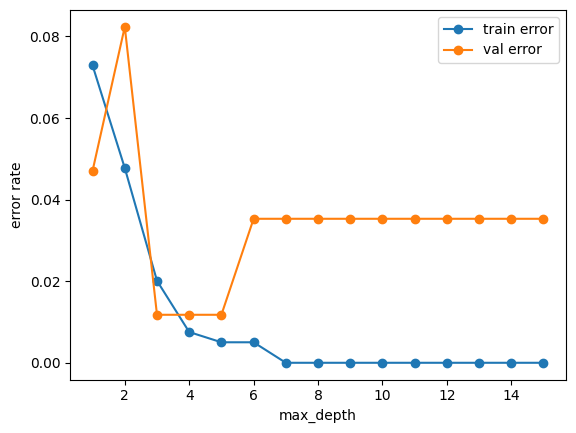

3

In [ ]:
depths = range(1, 16)
train_err, val_err = [], []

for d in depths:
    t = DecisionTreeClassifier(max_depth=d, criterion="entropy", random_state=42)
    t.fit(X_train, y_train)
    train_err.append(error_rate(y_train, t.predict(X_train)))
    val_err.append(error_rate(y_val, t.predict(X_val)))

plt.figure()
plt.plot(list(depths), train_err, marker="o", label="train error")
plt.plot(list(depths), val_err, marker="o", label="val error")
plt.xlabel("max_depth")
plt.ylabel("error rate")
plt.legend()
plt.show()

best_depth = depths[int(np.argmin(val_err))]
best_depth


The elbow plot shows training error decreasing towards zero as depth increases, while validation error stabilizes, identifying depth 3 as the optimal point.

B4: Final evaluation on test set
Tests the final tuned model on unseen data to obtain an unbiased estimate of real-world accuracy.

In [ ]:
final_tree = DecisionTreeClassifier(max_depth=best_depth, criterion="entropy", random_state=42)
final_tree.fit(X_train, y_train)

test_pred = final_tree.predict(X_test)
print("Test error:", error_rate(y_test, test_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, test_pred))


Test error: 0.09302325581395349
Confusion matrix:
 [[26  6]
 [ 2 52]]


The model achieves a test error of ~0.093, with the confusion matrix showing 78 correct predictions and 8 misclassifications.

B5: Interpretability: print rules + visualize (optional plot)
Generates human-readable decision logic and a visual tree structure for model transparency.

|--- worst radius <= 16.80
|   |--- worst concave points <= 0.14
|   |   |--- symmetry error <= 0.02
|   |   |   |--- class: 1
|   |   |--- symmetry error >  0.02
|   |   |   |--- class: 1
|   |--- worst concave points >  0.14
|   |   |--- worst texture <= 25.62
|   |   |   |--- class: 1
|   |   |--- worst texture >  25.62
|   |   |   |--- class: 0
|--- worst radius >  16.80
|   |--- mean concavity <= 0.07
|   |   |--- mean texture <= 19.83
|   |   |   |--- class: 1
|   |   |--- mean texture >  19.83
|   |   |   |--- class: 0
|   |--- mean concavity >  0.07
|   |   |--- class: 0



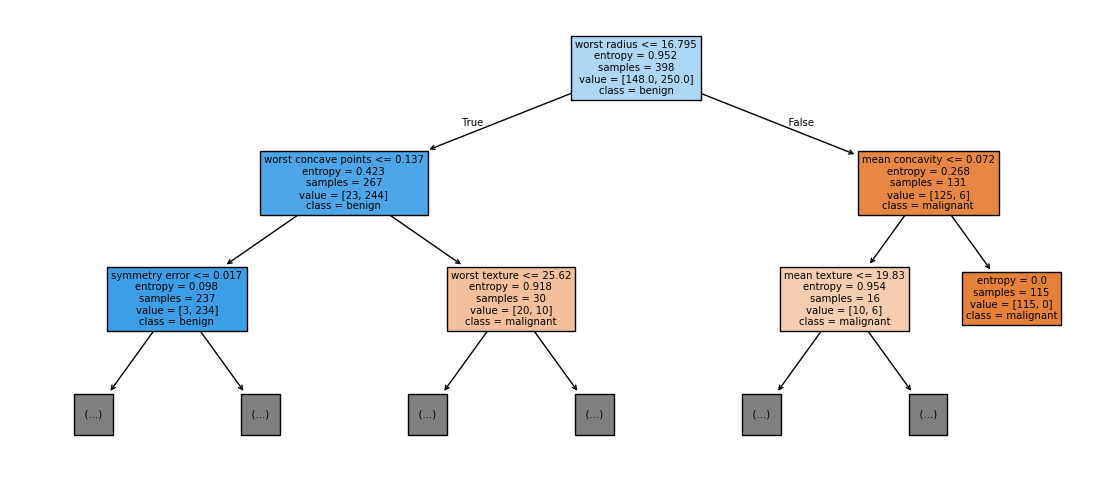

In [ ]:
print(export_text(final_tree, feature_names=list(X.columns)))

plt.figure(figsize=(14,6))
plot_tree(final_tree, feature_names=list(X.columns), class_names=list(data.target_names), filled=True, max_depth=2)
plt.show()


The visual tree reveals that 'worst radius' and 'worst concave points' are the most critical features for classifying tumors as malignant or benign.